# A function with interactions

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
np.random.seed(42)
n = 1000
X = pd.DataFrame({ 'x1': np.random.uniform(140, 200, n), 'x2': np.random.uniform(0, 10, n) })
y = 0.1 * X.x1 - 1 * X.x2 + 10 * (X.x1 < 160) * (X.x2 > 7) - 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

/root/miniconda3/envs/torch/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


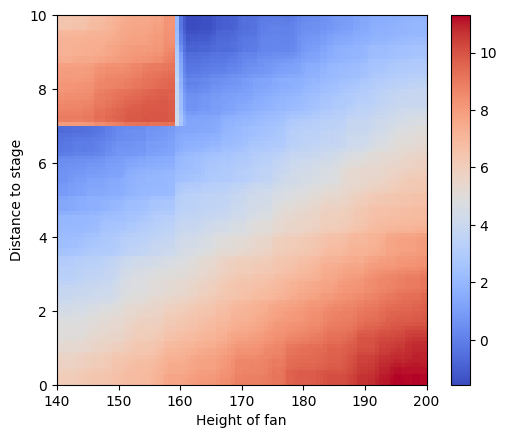

In [6]:
# Generate x1 and x2 grids
x1 = np.linspace(140, 200, 100)
x2 = np.linspace(0, 10, 100)
xx1, xx2 = np.meshgrid(x1, x2)
# Flatten the grids and predict color
Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
color = rf_model.predict(Xgrid)
# Reshape the predicted color array
color = color.reshape(xx1.shape) 
# Plot the heatmap
plt.imshow(color, extent=[x1.min(), x1.max(), x2.min(), x2.max()], origin='lower', cmap='coolwarm', aspect=6)
plt.xlabel('Height of fan')
plt.ylabel('Distance to stage')
plt.colorbar()
plt.show()

# Computing SHAP values

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


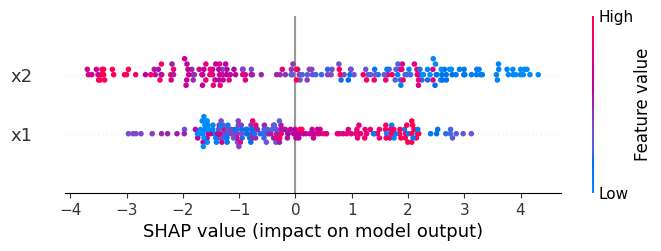

In [7]:
import shap
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

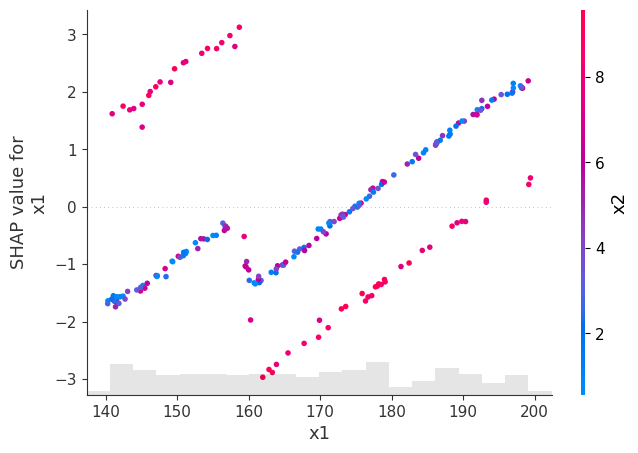

In [8]:
shap.plots.scatter(shap_values[:,0], color=shap_values)

In [9]:
# Creating data for Mia and Tom 
Xnew = pd.DataFrame({'x1': [159, 161], 'x2': [2,2]})
print("""
Mia: {mia}
Tom: {tom}
Expected: {exp}
""".format(
    mia=round(rf_model.predict(Xnew)[0], 2),
    tom=round(rf_model.predict(Xnew)[1], 2),
    exp=round(explainer.expected_value[0], 2)
))


Mia: 5.88
Tom: 6.07
Expected: 4.86



In [10]:
shap_values = explainer(Xnew)
print('Mia')
print(shap_values[0].values)
print('Tom')
print(shap_values[1].values)

Mia
[-0.15944093  1.18150926]
Tom
[-1.37794848  2.5913748 ]
